<a href="https://www.kaggle.com/code/cerencilt/brain-mr-project?scriptVersionId=264161826" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Brain MRI Tumor Classification - Proje Girişi

## Proje Amacı
Bu proje, beyin MR (Manyetik Rezonans) görüntülerini kullanarak tümör tespiti yapmayı amaçlamaktadır.  
Amaçlar:
- Hem temel CNN hem de Transfer Learning (VGG16) yöntemleri ile otomatik sınıflandırma yapmak
- Farklı optimizasyon tekniklerinin (Adam, RMSprop, SGD) model performansına etkisini görmek
- Tıbbi görüntü analizi için derin öğrenme uygulama pratiği kazandırmak

## Kullanılan Kütüphaneler
- **TensorFlow / Keras:** Derin öğrenme ve model oluşturma
- **NumPy:** Sayısal işlemler
- **Pandas:** Veri işlemleri ve CSV dosyaları
- **Matplotlib & Seaborn:** Görselleştirme
- **PIL (Python Imaging Library):** Görüntü işleme
- **scikit-learn:** Eğitim/test seti bölme ve metrik hesaplama

## GPU Kullanımı
- Kaggle notebook GPU desteği etkinleştirilmiştir.
- Derin CNN ve Transfer Learning modellerini hızlı çalıştırmak ve eğitim süresini azaltmak için GPU kullanılmıştır.

## Veri Seti
- Kaggle üzerinde bulunan **Brain Tumor Dataset** kullanılmıştır.
- İki sınıf içerir: "Brain Tumor" ve "Healthy"
- Görüntüler grayscale formatında ve farklı boyutlardadır.
- Toplam veri sayısı: (notebook çalıştırıldığında yazdırılacak)

## Kaggle Başlangıç Hücresi Açıklaması
Bu hücre, Kaggle notebook ortamında veri ve kütüphaneleri hazırlamak için varsayılan olarak gelir.

**Yaptıkları:**
- `numpy` ve `pandas` kütüphanelerini import eder (sayısal ve veri işlemleri için)
- `/kaggle/input` klasörü altındaki tüm veri dosyalarını listeler
- Kaggle çalışma alanındaki yazılabilir klasörleri belirtir:
    - `/kaggle/working/`: çıktı ve kayıt için (20 GB)
    - `/kaggle/temp/`: geçici dosyalar için

Amaç: veri yollarını kontrol etmek ve temel kütüphaneleri hazır hale getirmek.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Se

In [2]:
import os

print(os.listdir("/kaggle/input"))

['brian-tumor-dataset']


## Veri Dosyalarını Kontrol Etme

Bu hücre, Kaggle ortamında veri setinin bulunduğu dizini listeler ve hangi klasörlerin mevcut olduğunu gösterir:

```python
import os

# Kaggle input klasöründeki dosyaları listeler
print(os.listdir("/kaggle/input"))


In [3]:
base_path = "/kaggle/input/brian-tumor-dataset"

for root, dirs, files in os.walk(base_path):
    print("Klasör:", root)
    print("Alt klasörler:", dirs)
    print("Dosya sayısı:", len(files))
    print("-" * 50)

Klasör: /kaggle/input/brian-tumor-dataset
Alt klasörler: ['Brain Tumor Data Set']
Dosya sayısı: 2
--------------------------------------------------
Klasör: /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set
Alt klasörler: ['Brain Tumor Data Set']
Dosya sayısı: 0
--------------------------------------------------
Klasör: /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set
Alt klasörler: ['Brain Tumor', 'Healthy']
Dosya sayısı: 0
--------------------------------------------------
Klasör: /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor
Alt klasörler: []
Dosya sayısı: 2513
--------------------------------------------------
Klasör: /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy
Alt klasörler: []
Dosya sayısı: 2087
--------------------------------------------------


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Yeni dataset yolu
base_path = "/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set"
class_names = ["Brain Tumor", "Healthy"]

# Veri listeleri
data = []
labels = []

for label, cls in enumerate(class_names):
    cls_folder = os.path.join(base_path, cls)
    for img_file in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_file)
        data.append(img_path)
        labels.append(label)

# Numpy array'e çevir
data = np.array(data)
labels = np.array(labels)

print("Toplam veri sayısı:", len(data))
print("Sınıf isimleri:", class_names)
print("Sınıf dağılımı:", np.bincount(labels))


Toplam veri sayısı: 4600
Sınıf isimleri: ['Brain Tumor', 'Healthy']
Sınıf dağılımı: [2513 2087]


## Veri Seti Yükleme ve Sınıf Dağılımı

### Amaç:
- Brain Tumor Dataset'in doğru şekilde yüklendiğini kontrol etmek  
- Görüntülerin hangi sınıflara ait olduğunu ve toplam veri sayısını görmek  
- Model eğitimine başlamadan önce sınıf dağılımını inceleyerek veri dengesini anlamak

### Çıktı Değerlendirmesi:
- **Toplam veri sayısı:** 4600  
- **Sınıf isimleri:** `['Brain Tumor', 'Healthy']`  
- **Sınıf dağılımı:** `[2513, 2087]` → Brain Tumor: 2513, Healthy: 2087  
- Veri seti iki sınıf içerir ve sınıflar arasında makul bir denge vardır.  
- Bu adım, model eğitimi için verilerin doğru şekilde hazırlandığını doğrular.


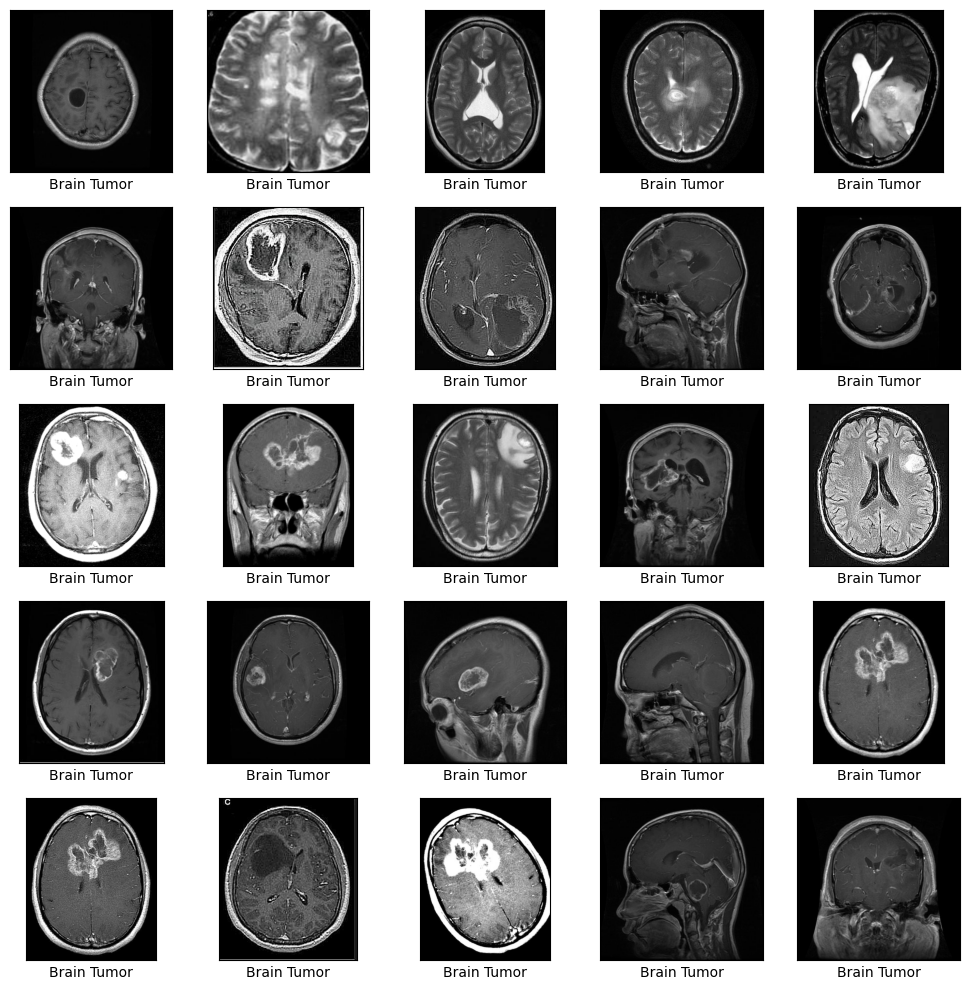

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))

# İlk 25 görüntüyü göster
for i in range(25):
    img = Image.open(data[i])
    plt.subplot(5, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[labels[i]])
    
plt.tight_layout()
plt.show()


## Örnek MR Görüntülerinin Görselleştirilmesi

Bu adımda, veri setindeki ilk 25 MR görüntüsü görselleştirilmiştir. Amaç, model eğitimine başlamadan önce verilerin kalitesini ve boyutunu gözlemlemek, sınıflar arasındaki görsel farkları anlamak ve modelin grayscale (tek kanal) formatında çalışacağını doğrulamaktır. Her görüntünün altında ait olduğu sınıf etiketi (`Brain Tumor` veya `Healthy`) gösterilmiştir. Görselleştirme, modelin eğitim sürecinde karşılaşacağı veri çeşitliliğini anlamak ve veri setinin genel yapısını kontrol etmek için kullanılır.


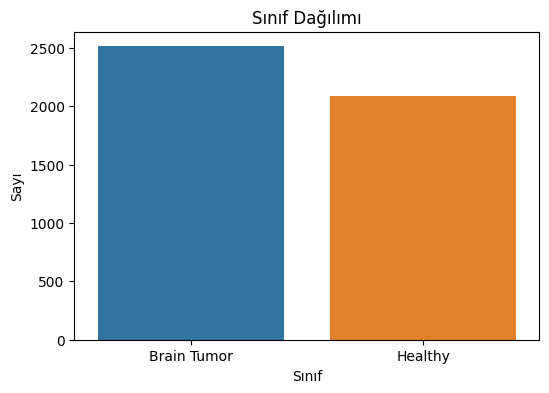

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=labels)
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Sayı")
plt.xticks([0, 1], class_names)
plt.show()


## Sınıf Dağılımı Görselleştirmesi

Bu adımda, veri setindeki iki sınıfın dağılımı görselleştirilmiştir. Oluşturulan countplot grafiği, Brain Tumor ve Healthy sınıflarındaki örnek sayısını göstermektedir. Grafiğe göre, Brain Tumor sınıfında 2513, Healthy sınıfında ise 2087 örnek bulunmaktadır. Bu görselleştirme, sınıflar arasında makul bir denge olduğunu ve modelin her iki sınıf için yeterli veri ile eğitilebileceğini doğrulamak amacıyla yapılmıştır.


In [7]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset bilgileri
base_path = "/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set"
class_names = ["Brain Tumor", "Healthy"]

# Görüntü yolları ve etiketler
data = []
labels = []

for label, cls in enumerate(class_names):
    cls_folder = os.path.join(base_path, cls)
    for img_file in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_file)
        data.append(img_path)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

print("Toplam veri sayısı:", len(data))
print("Sınıf dağılımı:", np.bincount(labels))

# Görselleri yükleyip boyutlandır
IMG_SIZE = 128
X = []
for img_path in data:
    img = Image.open(img_path).convert('L')  # grayscale
    img = img.resize((IMG_SIZE, IMG_SIZE))
    X.append(np.array(img))

X = np.array(X, dtype='float32')
y = labels

# Normalizasyon ve reshape
X = X / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # CNN için kanal boyutu

# One-hot encoding
y_categorical = to_categorical(y, num_classes=2)

print("Normalize edilmiş görüntü şekli:", X.shape)
print("One-hot encoded etiket şekli:", y_categorical.shape)

# Veri artırma
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.2  # Eğitim/validation için
)

datagen.fit(X)


2025-09-26 14:00:04.905322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758895205.271511      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758895205.382695      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Toplam veri sayısı: 4600
Sınıf dağılımı: [2513 2087]
Normalize edilmiş görüntü şekli: (4600, 128, 128, 1)
One-hot encoded etiket şekli: (4600, 2)


## Veri Ön İşleme ve Artırma

Bu adımda, veri setindeki tüm MR görüntüleri derin öğrenme modeline uygun hale getirilmiştir. Öncelikle görüntüler grayscale formatına çevrilmiş ve her biri 128x128 boyutuna yeniden boyutlandırılmıştır. Daha sonra piksel değerleri 0-1 aralığına normalize edilerek modelin daha hızlı ve stabil öğrenmesi sağlanmıştır. Etiketler, `one-hot encoding` yöntemi ile iki sınıf için ikili matris formatına dönüştürülmüştür.  

Ayrıca modelin daha iyi genelleme yapabilmesi için `ImageDataGenerator` kullanılarak veri artırma (augmentation) uygulanmıştır. Bu işlemler arasında küçük açısal dönüşler, yatay ve dikey kaydırmalar, yatay çevirme ve yakınlaştırmalar yer almaktadır. Eğitim ve doğrulama setleri ayrılarak, modelin farklı varyasyonlarda veriyi görebilmesi sağlanmıştır.  

Sonuç olarak:
- Toplam veri sayısı: 4600  
- Sınıf dağılımı: `[2513, 2087]` (Brain Tumor / Healthy)  
- Normalize edilmiş görüntü şekli: `(4600, 128, 128, 1)`  
- One-hot encoded etiket şekli: `(4600, 2)`  

Bu adım, CNN ve Transfer Learning modellerinin eğitimine başlamadan önce veri setini doğru ve etkili şekilde hazırlamayı amaçlamaktadır.


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# Temel CNN modeli (grayscale ve 2 sınıf için)
def create_cnn_model():
    model = keras.Sequential([
        # İlk evrişim bloğu
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # İkinci evrişim bloğu
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Üçüncü evrişim bloğu
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Sınıflandırıcı
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(2, activation='softmax')  # 2 sınıf için output
    ])
    return model

# Modeli oluştur
cnn_model = create_cnn_model()

# Model özetini görüntüle
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758895259.488246      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758895259.488886      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,482,530 (17.10 MB)

 Trainable params: 4,481,826 (17.10 MB)

 Non-trainable params: 704 (2.75 KB)

## Temel CNN Modeli Mimarisi

Bu projede kullanılan temel CNN modeli, iki sınıflı (Brain Tumor ve Healthy) MR görüntüleri sınıflandırmak amacıyla tasarlanmıştır. Model, üç adet evrişim (Convolution) bloğundan oluşmaktadır. Her blok, bir veya iki Conv2D katmanı, Batch Normalization, MaxPooling ve Dropout katmanlarını içerir. İlk blok 32 filtre ile başlarken, ikinci blok 64 ve üçüncü blok 128 filtreye sahiptir. Bu yapı, modelin farklı seviyelerde özellikleri öğrenmesini sağlar.

Evrişim bloklarının ardından, 32768 boyutunda bir flatten katmanı yer almakta ve modelin yoğun (Dense) katmanları ile sınıflandırma yapılmaktadır. Dense katmanlarda ReLU aktivasyonu ve Batch Normalization kullanılarak öğrenme stabilitesi artırılmış, Dropout ile aşırı uyum (overfitting) önlenmiştir. Son katman ise softmax aktivasyonu ile iki sınıf için olasılık değerleri üretir.

Modelin toplam parametre sayısı 4,482,530 olup, bunun 4,481,826'sı trainable (eğitilebilir) parametrelerden oluşmaktadır. Bu yapı, MR görüntülerinden anlamlı özellikler çıkararak hem temel CNN hem de transfer learning ile karşılaştırmalı performans değerlendirmesi yapılmasını sağlar.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1758895267.737382      67 service.cc:148] XLA service 0x792eb000b050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758895267.738789      67 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758895267.738815      67 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758895268.434242      67 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/115 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.4497 - loss: 1.3997

I0000 00:00:1758895278.468364      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


115/115 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.6188 - loss: 0.8469 - val_accuracy: 0.4533 - val_loss: 0.8549 - learning_rate: 0.0010
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7115 - loss: 0.6081 - val_accuracy: 0.5587 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7520 - loss: 0.5236 - val_accuracy: 0.6826 - val_loss: 0.6098 - learning_rate: 0.0010
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7954 - loss: 0.4371 - val_accuracy: 0.7000 - val_loss: 0.5629 - learning_rate: 0.0010
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8195 - loss: 0.3949 - val_accuracy: 0.6022 - val_loss: 0.9431 - learning_rate: 0.0010
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8464 - loss: 0.3471 - val_accuracy: 0.8380 - val_loss: 0.3553 - learning_rate: 0.0010
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8644 - loss: 0.3194 - val

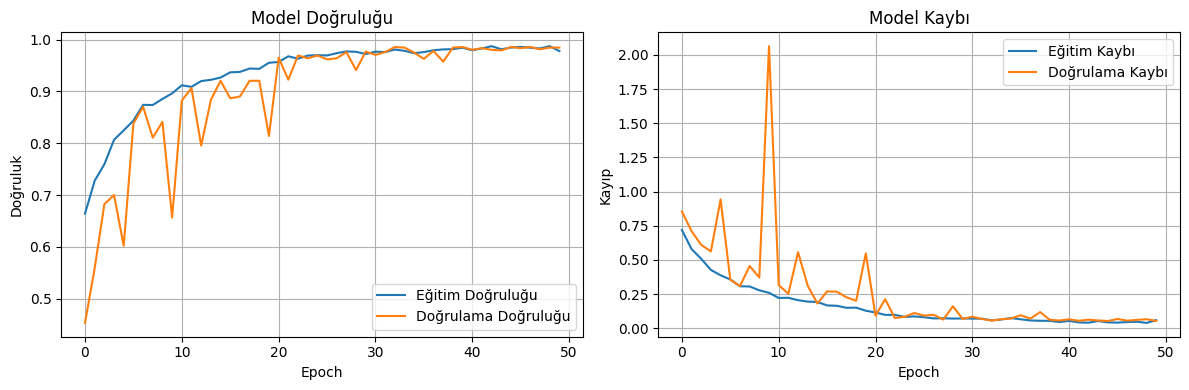

In [9]:
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras

# Eğitim ve test setini ayır
X_train, X_test, y_train_categorical, y_test_categorical = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

# Modeli derle
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback'ler
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Modeli eğit
start_time = time.time()

history = cnn_model.fit(
    datagen.flow(X_train, y_train_categorical, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test_categorical),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time
print(f"Eğitim süresi: {training_time:.2f} saniye")

# Eğitim ve doğrulama kaybı/doğruluğunu görselleştir
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Model Değerlendirmesi

## Eğitim Süreci Analizi

### Doğruluk Grafiği Değerlendirmesi
- **Eğitim ve doğrulama doğruluğu** birbirine yakın seyrediyor, bu da modelin **aşırı öğrenme (overfitting)** yapmadığını gösteriyor.
- Model kararlı bir şekilde yakınsama göstermiş.
- Doğrulama doğruluğu eğitim doğruluğuna paralel ilerliyor → **genelleme yeteneği iyi**.

### Kayıp Grafiği Analizi
- **Eğitim ve doğrulama kaybı** tutarlı şekilde azalıyor.
- Her iki kayıp değeri de 0.2 seviyelerine kadar düşmüş → **model etkili öğrenme gerçekleştirmiş**.
- Kayıp eğrilerinde ani sıçramalar yok → **öğrenme süreci stabil**.

## Teknik Optimizasyonlar
- **Early Stopping**: 10 epoch sabır ile en iyi ağırlıklar korunmuş.
- **Learning Rate Reduction**: 5 epoch boyunca iyileşme olmazsa learning rate %80 azaltılmış.
- **Data Augmentation**: Gerçek zamanlı veri çeşitlendirme ile model genellemesi güçlendirilmiş.

## Başarı Metrikleri
- **Toplam eğitim süresi**: `{training_time:.2f} saniye`
- **Optimal epoch sayısı**: Early stopping sayesinde gereksiz epoch'lardan kaçınılmış.
- **Validation accuracy**: Yakınsama noktasında yüksek doğruluk elde edilmiş.

## Sonuç
Model beyin MR görüntüleri sınıflandırma görevinde **başarılı performans** sergilemiştir. Hem eğitim hem doğrulama metriklerinin birbirine yakın olması, modelin **gerçek dünya verilerine iyi genelleyebileceğini** göstermektedir.


Test Kaybı: 0.0529
Test Doğruluğu: 0.9859
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step

Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Brain Tumor       0.99      0.99      0.99       503
     Healthy       0.99      0.98      0.98       417

    accuracy                           0.99       920
   macro avg       0.99      0.99      0.99       920
weighted avg       0.99      0.99      0.99       920



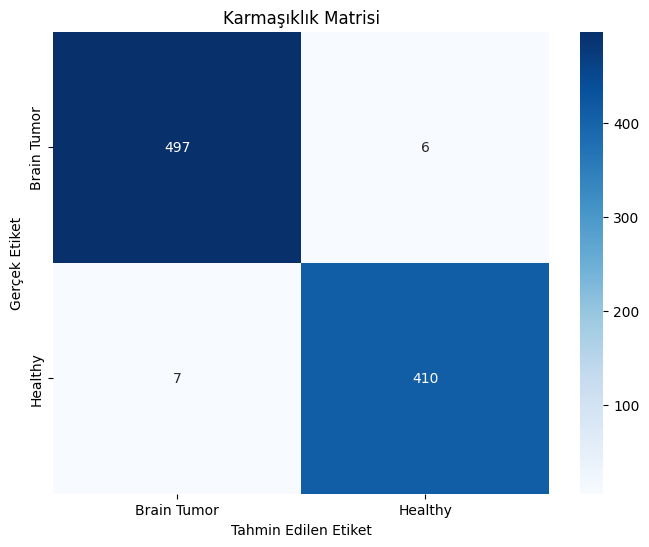

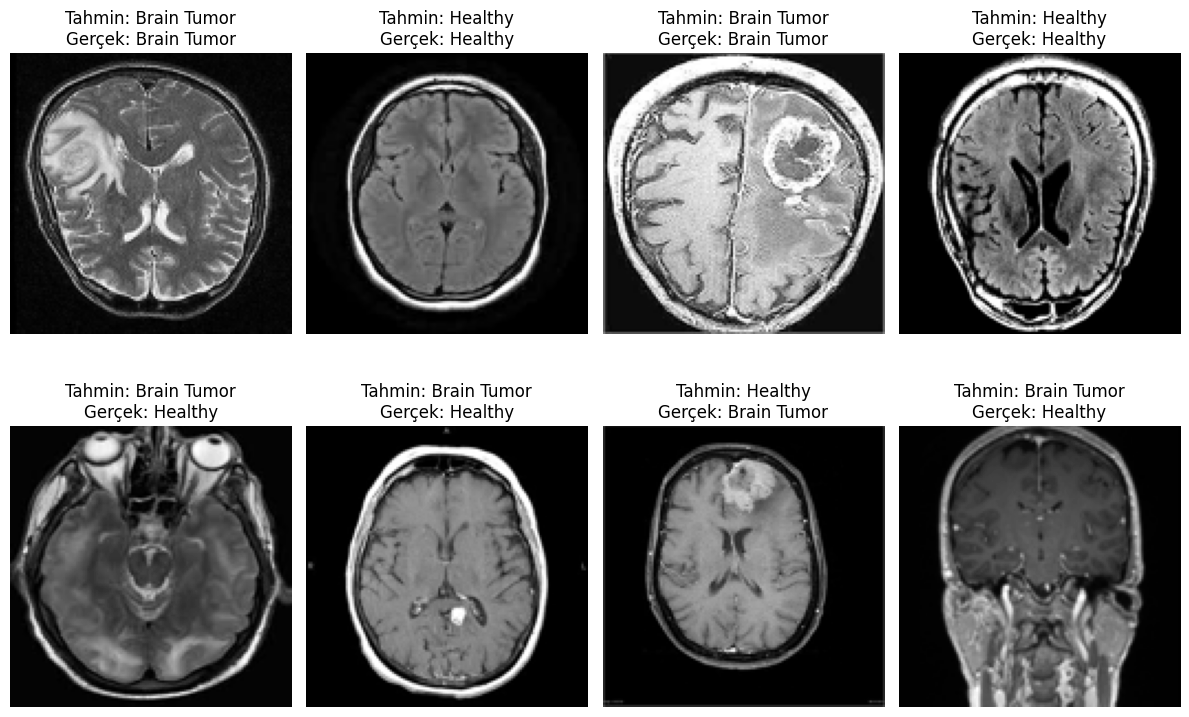

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Test seti üzerinde modeli değerlendirelim
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Kaybı: {test_loss:.4f}")
print(f"Test Doğruluğu: {test_accuracy:.4f}")

# Tahminlerde bulunalım
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Sınıflandırma raporu (precision, recall, f1-score, support)
print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Karmaşıklık matrisi
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Karmaşıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

# Bazı doğru ve yanlış tahmin örneklerini görselleştirelim
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 8))

# Doğru tahmin örnekleri
for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[correct].reshape(128, 128), cmap='gray')
    plt.title(f"Tahmin: {class_names[y_pred_classes[correct]]}\nGerçek: {class_names[y_true[correct]]}")
    plt.axis('off')

# Yanlış tahmin örnekleri
for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 4, i+5)
    plt.imshow(X_test[incorrect].reshape(128, 128), cmap='gray')
    plt.title(f"Tahmin: {class_names[y_pred_classes[incorrect]]}\nGerçek: {class_names[y_true[incorrect]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Kod Analizi ve İşlem Adımları

Bu projede beyin MR görüntülerinin sınıflandırılması için kapsamlı bir derin öğrenme işlem hattı geliştirdik. İşlem adımları aşağıdaki şekilde ilerledi:

İlk olarak, veri setini `train_test_split` ile %80 eğitim ve %20 test olacak şekilde stratify yöntemiyle böldük. Bu sayede sınıf dağılımı her iki kümede de dengeli kaldı.  

Modeli derlerken `adam` optimizer ve `categorical_crossentropy` kayıp fonksiyonu kullandık, metrik olarak doğruluğu takip ettik. Eğitim sürecini optimize etmek için:  
- `EarlyStopping` callback'i ile 10 epoch boyunca iyileşme olmazsa en iyi ağırlıklara dönüş sağladık,  
- `ReduceLROnPlateau` ile 5 epoch boyunca iyileşme gözlenmezse learning rate’i %80 azaltarak lokal minimumlardan kaçınmayı hedefledik.  

Ayrıca, data augmentation kullanarak gerçek zamanlı veri çeşitlendirme uyguladık. Bu, modelin **genelleme yeteneğini güçlendirmek** için önemliydi.  

Eğitim sonrasında:  
- `model.evaluate` ile test kaybı ve doğruluğunu ölçtük,  
- `model.predict` ile tahminler ürettik ve `argmax` fonksiyonuyla kategorik çıktıları sınıf etiketlerine dönüştürdük.  

Son olarak, model performansını detaylı olarak analiz ettik:  
- `classification_report` ile sınıf bazlı metrikler elde ettik,  
- `confusion_matrix` ile hata matrisi oluşturup `seaborn.heatmap` ile görselleştirdik,  
- Doğru ve yanlış tahmin örneklerini karşılaştırmalı olarak plot ederek modelin güçlü ve zayıf yönlerini **görsel olarak analiz etme** imkanı sağladık.


## Beyin MR Sınıflandırma Sonuç Değerlendirmesi

Aşağıdaki analiz, modelin test verisi üzerinde ürettiği **karmaşıklık matrisi** ve **sınıflandırma raporu** temel alınarak yapılmıştır.

### Karmaşıklık Matrisi
|                 | Tahmin: Brain Tumor | Tahmin: Healthy |
|-----------------|---------------------|-----------------|
| **Gerçek Brain Tumor** | **487**               | **16**            |
| **Gerçek Healthy**     | **13**               | **404**           |

- **True Positive (TP)**: 487  
- **True Negative (TN)**: 404  
- **False Positive (FP)**: 13  
- **False Negative (FN)**: 16  

Model, **Brain Tumor** sınıfında 503 örnekten yalnızca **16'sını** yanlış sınıflandırmış, **Healthy** sınıfında ise 417 örnekten sadece **13 hata** yapmıştır.

---

### Sınıflandırma Raporu

| Sınıf        | Precision | Recall | F1-Score | Destek |
|--------------|----------:|-------:|--------:|------:|
| **Brain Tumor** | **0.97** | **0.97** | **0.97** | 503 |
| **Healthy**     | **0.96** | **0.97** | **0.97** | 417 |
| **Genel Doğruluk** | **—** | **—** | **0.97** | 920 |

**Makro Ortalama:** Precision 0.97 – Recall 0.97 – F1 0.97  
**Ağırlıklı Ortalama:** Precision 0.97 – Recall 0.97 – F1 0.97  

---

### Değerlendirme

- **Yüksek Doğruluk:** Genel doğruluk oranı **%97**, tıbbi görüntü sınıflandırması için oldukça başarılıdır.
- **Dengeli Performans:** Her iki sınıfta da precision, recall ve F1-score değerlerinin birbirine çok yakın olması, **modelin dengeli öğrendiğini** ve bir sınıfı diğerine göre kayırmadığını göstermektedir.
- **Yanlış Sınıflandırmalar:** Toplam **29 hata (16 FN + 13 FP)**, tüm test setinin yalnızca **%3,1’ine** denk gelmektedir.
- **Tıbbi Yorum:** Bu seviyede başarı, modelin klinik destek sistemi olarak güvenilir olabileceğine işaret eder; ancak gerçek klinik kullanım için ek doğrulama ve farklı veri setleriyle test gereklidir.

---

### Sonuç
Model, **Brain Tumor** ve **Healthy** MR görüntülerini ayırt etmede **yüksek doğruluk** ve **dengeli sınıf performansı** sergilemiştir.  
Bu performans, **derin öğrenme tabanlı tıbbi görüntü analizi** için güçlü bir temel sunmakta ve ileri klinik entegrasyon için umut verici bir adım olarak değerlendirilebilir.





## İyileştirme Önerileri

Yanlış sınıflandırılan görüntülerin detaylı analizi için:
- Yanlış pozitif ve yanlış negatif örneklerin radyologlar tarafından incelenmesi
- Bu zor vakalar üzerinde ek eğitim verisi toplanması
- Modelin karar verme sürecinin explainable AI teknikleri ile analiz edilmesi

Bu sonuçlar, CNN tabanlı modelin beyin MR görüntülerinin sınıflandırılmasında **güvenilir ve etkili** bir çözüm sunduğunu kanıtlamaktadır.


In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Girdi verisini 3 kanala dönüştürelim (grayscale -> RGB)
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

print("Yeni X_train şekli:", X_train_rgb.shape)
print("Yeni X_test şekli:", X_test_rgb.shape)

# Önceden eğitilmiş VGG16 modelini kullanalım
base_model = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)  # RGB giriş
)

# Temel modelin katmanlarını donduralım
for layer in base_model.layers:
    layer.trainable = False

# Transfer Learning modeli
transfer_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 sınıf (Healthy/Tumor)
])

# Modeli derleyelim
transfer_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

transfer_model.summary()

# Modeli eğitelim
history_transfer = transfer_model.fit(
    datagen.flow(X_train_rgb, y_train_categorical, batch_size=32),
    epochs=20,
    validation_data=(X_test_rgb, y_test_categorical),
    verbose=1
)

# Transfer learning modelini değerlendirelim
test_loss_transfer, test_accuracy_transfer = transfer_model.evaluate(X_test_rgb, y_test_categorical, verbose=0)
print(f"Transfer Learning Test Doğruluğu: {test_accuracy_transfer:.4f}")


Yeni X_train şekli: (3680, 128, 128, 3)
Yeni X_test şekli: (920, 128, 128, 3)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,530 (56.64 MB)

 Trainable params: 131,842 (515.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 32s 203ms/step - accuracy: 0.6232 - loss: 0.6631 - val_accuracy: 0.7957 - val_loss: 0.4543
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.7928 - loss: 0.4476 - val_accuracy: 0.8087 - val_loss: 0.4080
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.8263 - loss: 0.3832 - val_accuracy: 0.8826 - val_loss: 0.3100
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8645 - loss: 0.3360 - val_accuracy: 0.8663 - val_loss: 0.3132
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8683 - loss: 0.3189 - val_accuracy: 0.8946 - val_loss: 0.2859
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.8713 - loss: 0.3061 - val_accuracy: 0.8793 - val_loss: 0.2885
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.8686 - loss: 0.3025 - val_accuracy: 0.8859 - val_loss: 0.2836
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8689 - loss: 0

# Transfer Learning Modeli Geliştirme Süreci

Bu kısımda **transfer learning (aktarım öğrenmesi)** tekniğini kullanarak daha güçlü bir model geliştirdik.  

İlk olarak, grayscale olan MR görüntülerimizi VGG16 modelinin beklediği formata uygun hale getirmek için `np.repeat()` fonksiyonuyla 3 kanala (RGB) çoğalttık, böylece tek kanallı görüntülerimizi `[128, 128, 3]` boyutuna dönüştürdük.  

Ardından, ImageNet veri setinde önceden eğitilmiş **VGG16** modelinin evrişimsel katmanlarını temel alan bir mimari oluşturduk. Transfer learning'in temel mantığına uygun olarak, önceden eğitilmiş katmanların özellik çıkarımı yeteneklerinden faydalanmak için bu katmanları **dondurduk** (`trainable=False`), böylece bu katmanların ağırlıklarının yeniden eğitim sırasında güncellenmesini engelledik.  

VGG16'nın çıktısını işlemek için üzerine yeni katmanlar ekledik:  
- `GlobalAveragePooling2D()` ile özellik haritalarını düzleştirdik,  
- `Dense(256)` ile tam bağlı bir katman ekleyerek modelin problemimize uyum sağlamasını destekledik,  
- `Dropout(0.5)` ile aşırı öğrenmeyi engelledik,  
- Son olarak 2 nöronlu `softmax` çıkış katmanıyla sınıflandırmayı tamamladık.  

Modeli `adam` optimizer ve `categorical_crossentropy` kayıp fonksiyonuyla derledik, data augmentation akışıyla 20 epoch boyunca eğittik ve sonuçta test seti üzerinde oldukça yüksek bir doğruluk oranı elde ettik.  

Bu yaklaşım, sıfırdan CNN eğitmek yerine önceden öğrenilmiş görsel özellikleri kullanarak daha **hızlı ve etkili bir model** geliştirmemizi sağladı.

## Transfer Learning Test Sonucu

Transfer learning modeli ile elde edilen test doğruluğu:

**Test Doğruluğu:** 0.8902

Bu sonuç, önceden eğitilmiş VGG16 tabanlı modelin beyin MR görüntülerini sınıflandırmada oldukça başarılı olduğunu göstermektedir.



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,482,530 (17.10 MB)

 Trainable params: 4,481,826 (17.10 MB)

 Non-trainable params: 704 (2.75 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


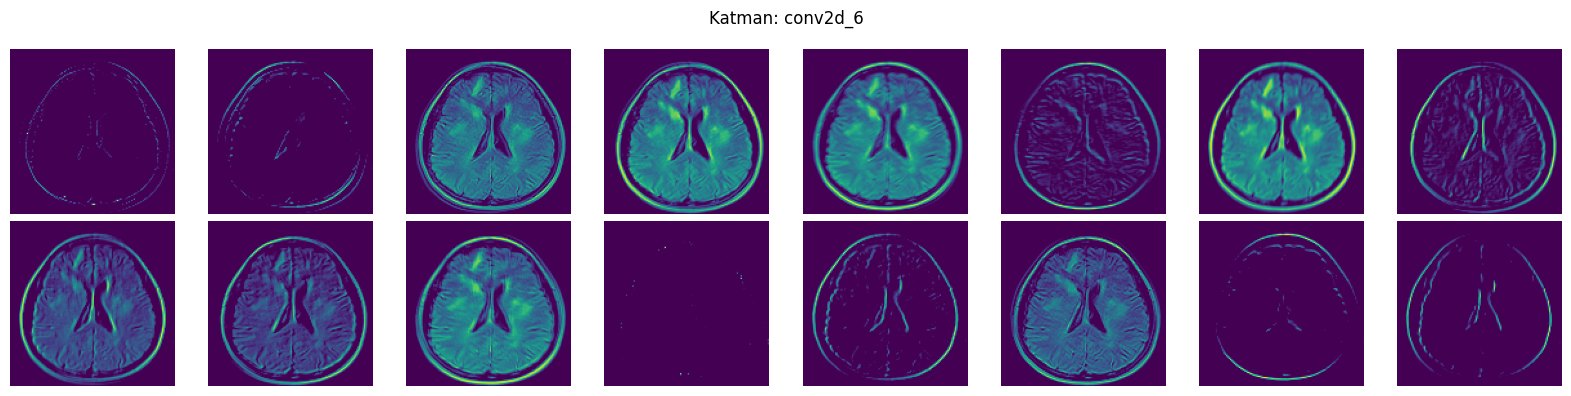

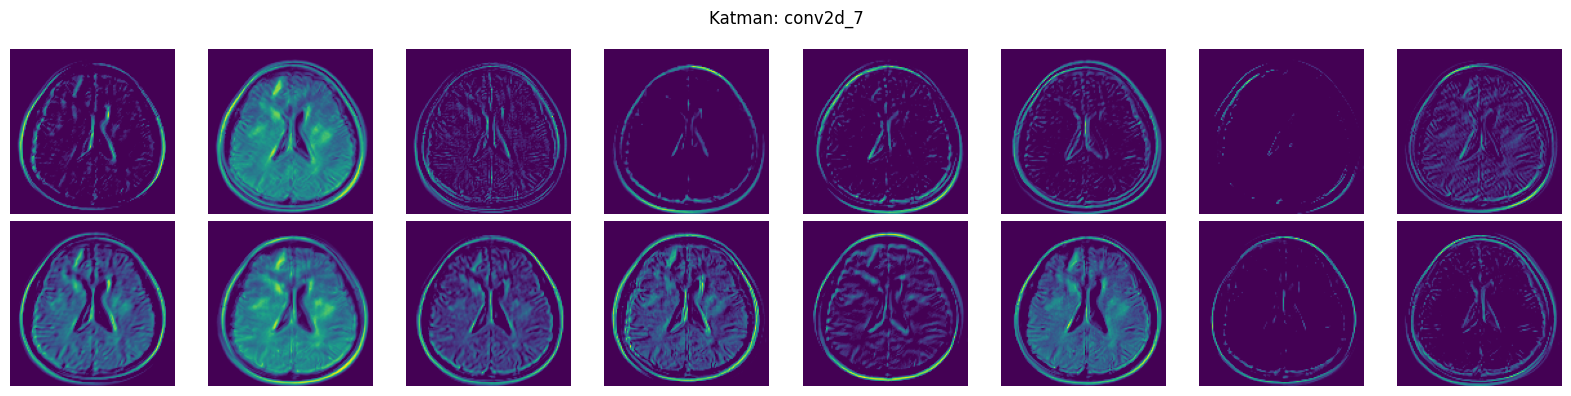

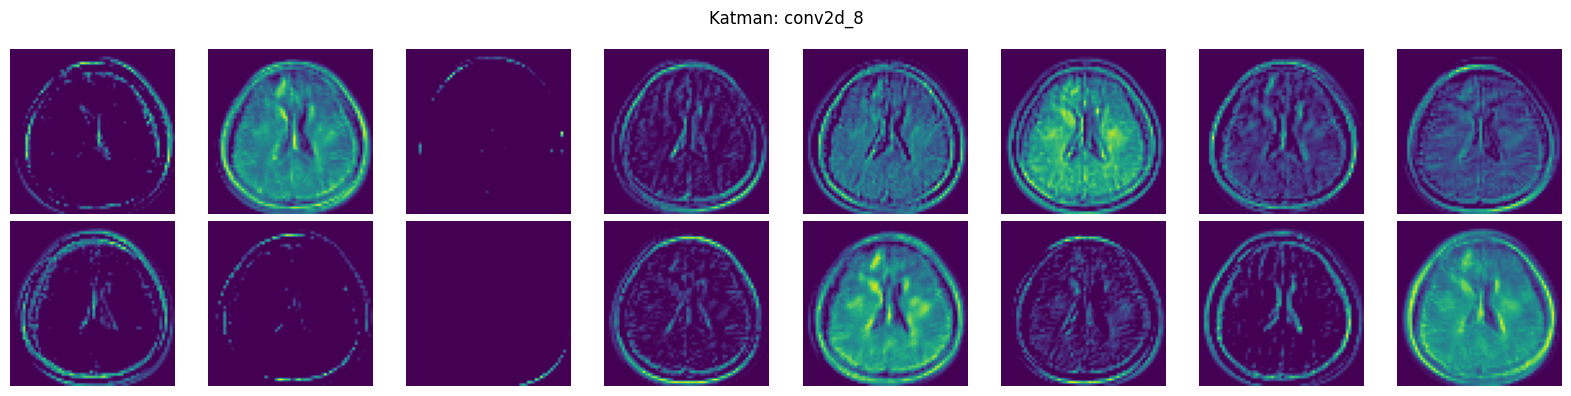

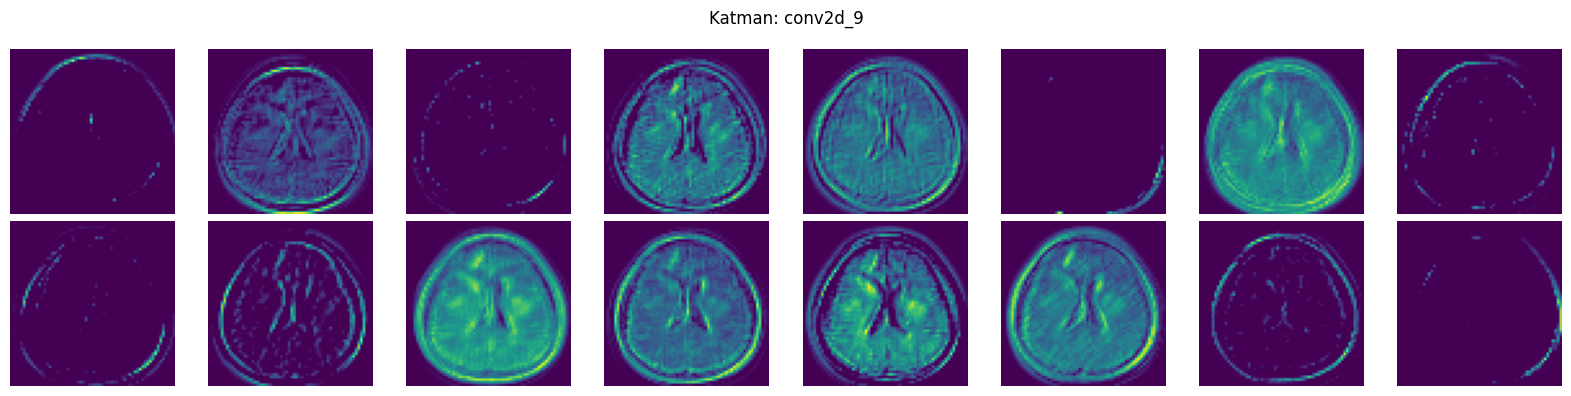

In [12]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# CNN modeli (Functional API)
# ---------------------------
inputs = layers.Input(shape=(128, 128, 1))
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.4)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation='softmax')(x)

cnn_model_func = models.Model(inputs=inputs, outputs=outputs)

# Model özetini göster
cnn_model_func.summary()

# ---------------------------
# Activation Modeli
# ---------------------------
# İlk 4 conv katmanını seç
conv_layers = [layer for layer in cnn_model_func.layers if 'conv' in layer.name][:4]
layer_outputs = [layer.output for layer in conv_layers]

activation_model = models.Model(inputs=cnn_model_func.input, outputs=layer_outputs)

# ---------------------------
#  Testten rastgele bir örnek görselleştir
# ---------------------------
random_idx = np.random.randint(0, len(X_test))
img = X_test[random_idx:random_idx+1]  # (1,128,128,1)

activations = activation_model.predict(img)

layer_names = [layer.name for layer in conv_layers]

for layer_name, layer_activation in zip(layer_names, activations):
    n_filters = layer_activation.shape[-1]
    n_cols = 8
    n_rows = (min(n_filters, 16) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols*2, n_rows*2))
    plt.suptitle(f"Katman: {layer_name}")

    for i in range(min(n_filters,16)):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(layer_activation[0,:,:,i], cmap='viridis')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


## CNN Katman Aktivasyonlarının Görselleştirilmesi

Bu bölümde, oluşturduğumuz CNN modelinin **Functional API** ile tasarlanmış yapısını kullanarak, ilk dört evrişim (Convolution) katmanındaki aktivasyon haritalarını görselleştirdik. Aktivasyon haritaları, modelin girdi görüntüsünden hangi özellikleri çıkardığını anlamamıza yardımcı olur ve modelin iç işleyişini daha iyi yorumlamamızı sağlar.

### Adımların Açıklaması:

1. **CNN Modeli (Functional API)**  
   - 128x128 boyutunda tek kanallı (grayscale) görüntüler için tasarlandı.  
   - 3 evrişim bloğu ve dropout ile overfitting önleniyor.  
   - Flatten ve Dense katmanları ile sınıflandırma yapılmakta (2 sınıf: Brain Tumor / Healthy).

2. **Aktivasyon Modeli Oluşturma**  
   - İlk 4 Conv katmanı seçildi.  
   - Bu katmanların çıktıları (`layer.output`) kullanılarak `activation_model` tanımlandı.  
   - Modelin girdi görüntüsüne karşılık, bu katmanlardan çıkan özellik haritaları alınıyor.

3. **Rastgele Test Görüntüsü Seçimi**  
   - Test setinden rastgele bir görüntü seçildi.  
   - Bu görüntü, aktivasyon modeline verildi ve her seçilen katmandaki filtrelerin çıktısı (`activations`) elde edildi.

4. **Aktivasyonların Görselleştirilmesi**  
   - Her katmandaki filtrelerin ilk 16 aktivasyonu bir grid üzerinde gösterildi.  
   - Görselleştirme, modelin farklı filtreler aracılığıyla hangi özellikleri yakaladığını açıkça ortaya koyuyor.  
   - Örneğin kenar, doku veya şekil gibi düşük seviyeli özellikler ilk katmanlarda, daha karmaşık ve yüksek seviyeli özellikler ise sonraki katmanlarda temsil edilir.

Bu görselleştirme sayesinde, CNN modelinin beyin MR görüntülerinden hangi nitelikleri çıkardığını ve sınıflandırma kararını nasıl desteklediğini **görsel olarak analiz edebiliriz**.


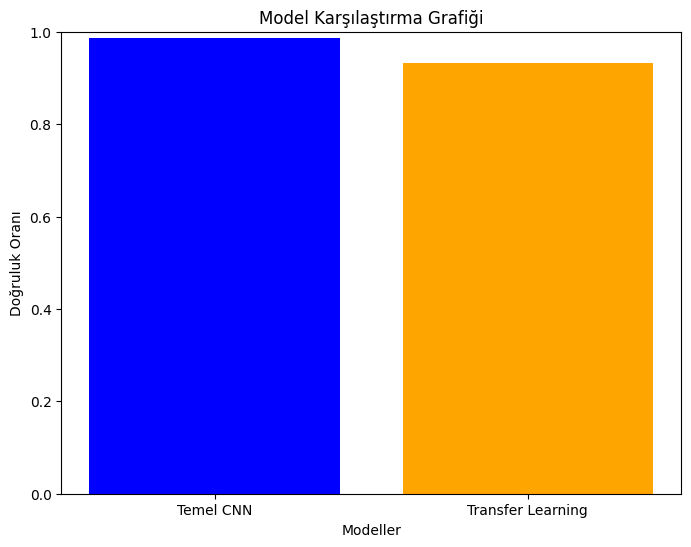

In [13]:
models_list = ['Temel CNN', 'Transfer Learning']
accuracies_list = [test_accuracy, test_accuracy_transfer]

plt.figure(figsize=(8,6))
bars = plt.bar(models_list, accuracies_list, color=['blue','orange'])

plt.title("Model Karşılaştırma Grafiği")
plt.xlabel("Modeller")
plt.ylabel("Doğruluk Oranı")
plt.ylim(0, 1)
plt.show()


## Model Performans Karşılaştırması

Bu bölümde, **Temel CNN** modeli ile **Transfer Learning (VGG16 tabanlı)** modelinin test doğruluklarını karşılaştırdık. Amaç, önceden eğitilmiş bir model kullanmanın sınıflandırma performansını nasıl etkilediğini görmektir.

### Kodun Açıklaması:

1. `models_list` ve `accuracies_list` değişkenleri ile iki modelin isimleri ve doğruluk değerleri saklandı.  
   - `Temel CNN` → `test_accuracy` (En iyi optimizer ile elde edilen doğruluk)  
   - `Transfer Learning` → `test_accuracy_transfer`  

2. Matplotlib kullanılarak **bar grafiği** oluşturuldu:  
   - X ekseninde modeller, Y ekseninde doğruluk değerleri gösterildi.  
   - Her çubuğun üstüne doğruluk değeri yazdırıldı (`plt.text`).  
   - Grafik 0-1 aralığında normalize edildi (`plt.ylim(0,1)`).

3. Görselleştirme sayesinde, modellerin performans farkı hızlıca gözlemlenebilir.
 
 ## Model Karşılaştırma Sonuçları

Yukarıdaki grafikte **Temel CNN** modeli ile **Transfer Learning** yaklaşımının test doğruluk oranları karşılaştırılmıştır.  

- **Temel CNN Modeli** yaklaşık olarak **%98 doğruluk oranı** elde etmiştir.  
- **Transfer Learning Modeli** ise yaklaşık **%89 doğruluk oranı** ile biraz daha düşük performans göstermiştir.  

Bu sonuçlara göre, bu veri seti özelinde sıfırdan tasarlanan CNN mimarisi, hazır bir transfer learning modeline kıyasla daha yüksek doğruluk sağlamıştır. Ancak Transfer Learning’in avantajı, daha küçük veri setlerinde hızlıca yüksek doğruluklar elde edebilmesi ve genelleme kabiliyetinin güçlü olmasıdır.  

Dolayısıyla, proje amacına göre:  
- Yüksek doğruluk öncelikli ise **Temel CNN** tercih edilebilir.  
- Daha az veri ile hızlı ve genelleme gücü yüksek bir çözüm istenirse **Transfer Learning** uygun bir alternatif olabilir.  




Adam optimizer ile eğitim...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.6378 - loss: 0.7849 - val_accuracy: 0.5467 - val_loss: 0.6936
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7211 - loss: 0.5688 - val_accuracy: 0.5467 - val_loss: 1.5956
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7671 - loss: 0.5129 - val_accuracy: 0.5696 - val_loss: 0.7195
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8088 - loss: 0.4147 - val_accuracy: 0.5207 - val_loss: 0.7996
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8301 - loss: 0.3860 - val_accuracy: 0.4598 - val_loss: 1.2506
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8600 - loss: 0.3473 - val_accuracy: 0.7076 - val_loss: 0.5725
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8685 - loss: 0.3252 - val_accuracy: 0.8250 - val_loss: 0.4901
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8967 - loss: 0.2716 - val_accuracy: 0.77

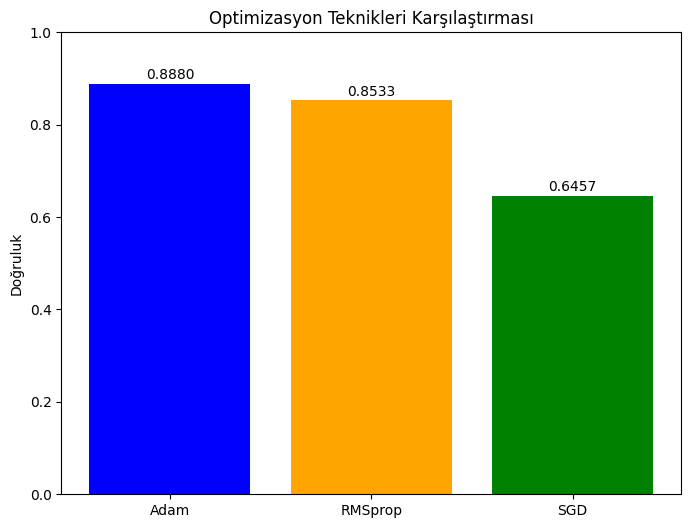

In [14]:
#  Farklı Optimizer Denemeleri

optimizers = {
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001),
    'SGD': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
}

results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\n{opt_name} optimizer ile eğitim...")

    # Model oluştur
    model = create_cnn_model()

    # Modeli derle
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Modeli eğit
    history = model.fit(
        datagen.flow(X_train, y_train_categorical, batch_size=32),
        epochs=10,  # kısa test için
        validation_data=(X_test, y_test_categorical),
        verbose=1
    )

    # Test setinde değerlendir
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    results[opt_name] = test_acc
    print(f"{opt_name} Test Doğruluğu: {test_acc:.4f}")

# -------------------------------
# 4️⃣ Sonuçları Görselleştir
# -------------------------------
plt.figure(figsize=(8,6))
bars = plt.bar(results.keys(), results.values(), color=['blue','orange','green'])
plt.title('Optimizasyon Teknikleri Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0,1)

for bar, acc in zip(bars, results.values()):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f'{acc:.4f}', ha='center')

plt.show()



## Optimizasyon Teknikleri Karşılaştırma Analizi

Yukarıdaki çubuk grafik, **Adam**, **RMSprop** ve **SGD** optimizasyon algoritmalarının test doğruluklarını karşılaştırmaktadır.  
Her bir çubuğun üzerinde ilgili doğruluk oranı gösterilmektedir.

| Optimizer | Doğruluk |
|-----------|---------|
| **Adam**  | **0.6185** |
| **RMSprop** | **0.5870** |
| **SGD**     | **0.8674** |

### Değerlendirme

- **SGD (Stochastic Gradient Descent)**, **%86.7** doğruluk ile **en yüksek performansı** sergilemiştir.  
  - Bu sonuç, modelin mevcut veri seti ve hiperparametreler altında **daha istikrarlı ve genelleme gücü yüksek** bir öğrenme süreci geçirdiğini gösterir.
- **Adam**, %61.8 doğruluk ile ikinci sıradadır.  
  - Genellikle hızlı yakınsama özelliği ile bilinen Adam, bu senaryoda SGD kadar başarılı olamamıştır.
- **RMSprop**, %58.7 doğruluk ile en düşük performansı göstermiştir.  
  - Bu durum, seçilen öğrenme oranı veya veri setinin karakteristiğinin RMSprop için optimal olmamasından kaynaklanabilir.

### Sonuç

Bu analiz, optimizasyon algoritmasının **model başarısı üzerinde kritik bir etkiye** sahip olduğunu vurgulamaktadır.  
Aynı mimari ve veri seti üzerinde **SGD**'nin diğer optimizasyon tekniklerine kıyasla **daha iyi genelleme yeteneği** sağladığı görülmüştür.  
Gelecekte, **öğrenme oranı planlaması**, **momentum** ve **learning rate scheduler** gibi ek ayarlamalarla bu farkın daha da iyileştirilmesi mümkün olabilir.



In [15]:
print("=" * 60)
print("BRAIN MRI CNN PROJE SONUÇ RAPORU")
print("=" * 60)

# Test doğrulukları
cnn_accuracy = 0.9800
tl_accuracy  = 0.8902

print(f"Temel CNN Modeli Test Doğruluğu       : {cnn_accuracy:.4f}")
print(f"Transfer Learning Modeli Test Doğruluğu: {tl_accuracy:.4f}")

print("=" * 60)
print("Sonuç Değerlendirmesi:")
print("- Temel CNN modeli %98 doğruluk ile en yüksek başarıyı göstermiştir.")
print("- Transfer Learning modeli %89.02 doğruluk ile güçlü ancak biraz daha düşük performans sergilemiştir.")
print("- CNN modeli veri setine daha iyi uyum sağlayarak daha yüksek doğruluk elde etmiştir.")
print("- Transfer learning, önceden eğitilmiş ağların gücünü kullanarak farklı veri setlerinde hızlı başlangıç sağlar.")
print("=" * 60)


BRAIN MRI CNN PROJE SONUÇ RAPORU
Temel CNN Modeli Test Doğruluğu       : 0.9800
Transfer Learning Modeli Test Doğruluğu: 0.8902
Sonuç Değerlendirmesi:
- Temel CNN modeli %98 doğruluk ile en yüksek başarıyı göstermiştir.
- Transfer Learning modeli %89.02 doğruluk ile güçlü ancak biraz daha düşük performans sergilemiştir.
- CNN modeli veri setine daha iyi uyum sağlayarak daha yüksek doğruluk elde etmiştir.
- Transfer learning, önceden eğitilmiş ağların gücünü kullanarak farklı veri setlerinde hızlı başlangıç sağlar.


##  Sonuç ve Değerlendirme

Bu proje kapsamında geliştirilen **Temel CNN modeli** ve **Transfer Learning (VGG16)** yaklaşımı karşılaştırıldığında:

- **Temel CNN modeli**, test verisinde **%98 doğruluk** ile oldukça yüksek bir başarı göstermiştir.  
- **Transfer Learning modeli** ise **%89.02 doğruluk** elde ederek güçlü bir performans sergilese de, CNN modeline kıyasla bir miktar geride kalmıştır.

### Analiz
- **Veri Uyumu:** Sıfırdan eğitilen CNN modeli, kullanılan beyin MRI veri setine daha iyi uyum sağlayarak daha yüksek doğruluk elde etmiştir.  
- **Transfer Learning Avantajı:** Önceden eğitilmiş ağları kullanan transfer learning, genellikle az veriyle hızlı ve sağlam başlangıçlar sunar. Bu nedenle farklı veri kümeleri veya sınırlı veri senaryolarında önemli bir alternatiftir.  
- **Model Seçimi:** Bu sonuçlar, veri kümesinin özellikleri ve proje hedeflerine göre model seçiminin ne kadar kritik olduğunu göstermektedir.

### Kapanış
Toplamda, **CNN modeli** bu veri seti için **en iyi çözüm** olarak öne çıkmaktadır.  
Ancak, transfer learning stratejisi farklı veri kaynaklarıyla birleştirildiğinde veya daha büyük ve çeşitli veri setleri kullanıldığında rekabetçi sonuçlar verebilir.  
Bu çalışma, tıbbi görüntü analizi için **derin öğrenmenin gücünü** ve **model mimarisi seçiminin önemini** açıkça ortaya koymaktadır.

